<a href="https://colab.research.google.com/github/pzoliveira/DSRandomForest/blob/main/DSRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando os Dados

In [1]:
import pickle

In [2]:
with open('credito.pkl', 'rb') as f:
  X_credito_treino, y_credito_treino, X_credito_teste, y_credito_teste = pickle.load(f)

In [3]:
X_credito_treino.shape, y_credito_treino.shape

((22806, 3), (22806,))

# Treinando o Modelo

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
rf_credito = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_credito.fit(X_credito_treino, y_credito_treino)

RandomForestClassifier(criterion='entropy')

# Previsão do Modelo

In [6]:
previsoes = rf_credito.predict(X_credito_teste)

In [7]:
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
y_credito_teste

array([0, 0, 0, ..., 1, 0, 0])

# Métricas do Modelo

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
accuracy_score(y_credito_teste, previsoes)

0.8379539641943734

In [11]:
confusion_matrix(y_credito_teste, previsoes)

array([[7190,  554],
       [1030, 1001]])

In [12]:
print(classification_report(y_credito_teste, previsoes))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7744
           1       0.64      0.49      0.56      2031

    accuracy                           0.84      9775
   macro avg       0.76      0.71      0.73      9775
weighted avg       0.83      0.84      0.83      9775



# Utilizando Gráficos

In [13]:
from yellowbrick.classifier import ConfusionMatrix

0.8379539641943734

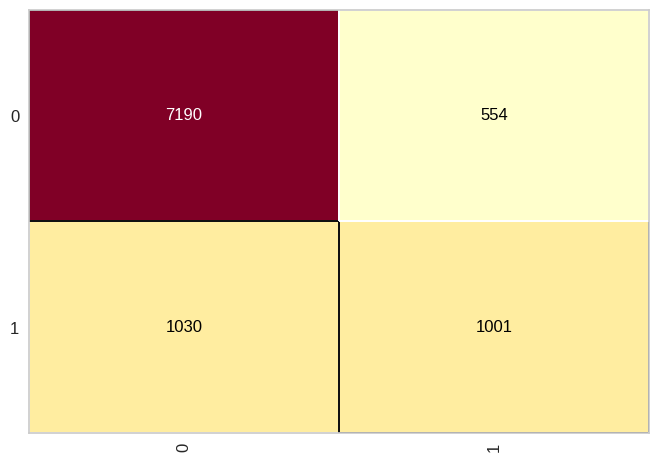

In [14]:
cm = ConfusionMatrix(rf_credito)
cm.fit(X_credito_treino, y_credito_treino)
cm.score(X_credito_teste, y_credito_teste)

# Balanceando os Dados

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
sm = SMOTE(random_state=42)

In [17]:
X_res_treino, y_res_treino = sm.fit_resample(X_credito_treino, y_credito_treino)

# Treinando o Modelo com Balanceamento

In [18]:
rf_res = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_res.fit(X_res_treino, y_res_treino)

RandomForestClassifier(criterion='entropy')

# Previsão do Modelo com Balanceamento

In [20]:
previsoes_res = rf_res.predict(X_credito_teste)